In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve
import warnings as w
w.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/sample_data/heart failure.csv')

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.shape

(299, 13)

In [5]:
df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

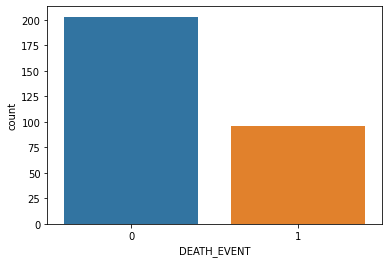

In [6]:
sns.countplot(df.DEATH_EVENT)

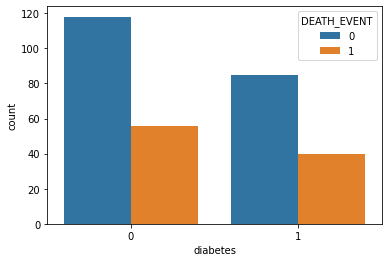

In [7]:
sns.countplot(x='diabetes', hue='DEATH_EVENT', data=df )

# **Separate X,Y**

In [8]:
x = df.drop('DEATH_EVENT', axis='columns')

In [9]:
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [10]:
y= df['DEATH_EVENT']

In [11]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

# **Split the data set into train and test**

In [12]:
xtrain,xtest, ytrain, ytest = tts(x,y,test_size =.30,random_state=1)

In [13]:
xtrain.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
14,49.0,1,80,0,30,1,427000.0,1.0,138,0,0,12
210,70.0,0,212,1,17,1,389000.0,1.0,136,1,1,188
236,75.0,0,119,0,50,1,248000.0,1.1,148,1,0,209
44,60.0,1,588,1,60,0,194000.0,1.1,142,0,0,33
163,50.0,1,2334,1,35,0,75000.0,0.9,142,0,0,126


In [14]:
xtrain.shape

(209, 12)

In [15]:
xtest.shape

(90, 12)

In [16]:
clf = DecisionTreeClassifier()

In [17]:
clf.fit(xtrain,ytrain)

DecisionTreeClassifier()

[Text(0.4089285714285714, 0.95, 'time <= 73.5\ngini = 0.446\nsamples = 209\nvalue = [139, 70]'),
 Text(0.14285714285714285, 0.85, 'serum_sodium <= 136.5\ngini = 0.27\nsamples = 56\nvalue = [9, 47]'),
 Text(0.05714285714285714, 0.75, 'serum_creatinine <= 0.85\ngini = 0.117\nsamples = 32\nvalue = [2, 30]'),
 Text(0.02857142857142857, 0.65, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.08571428571428572, 0.65, 'ejection_fraction <= 47.5\ngini = 0.062\nsamples = 31\nvalue = [1, 30]'),
 Text(0.05714285714285714, 0.55, 'gini = 0.0\nsamples = 26\nvalue = [0, 26]'),
 Text(0.11428571428571428, 0.55, 'anaemia <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.08571428571428572, 0.45, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.14285714285714285, 0.45, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.22857142857142856, 0.75, 'serum_sodium <= 139.5\ngini = 0.413\nsamples = 24\nvalue = [7, 17]'),
 Text(0.2, 0.65, 'time <= 11.5\ngini = 0.492\nsamples = 16\nvalue = [7, 9]'),

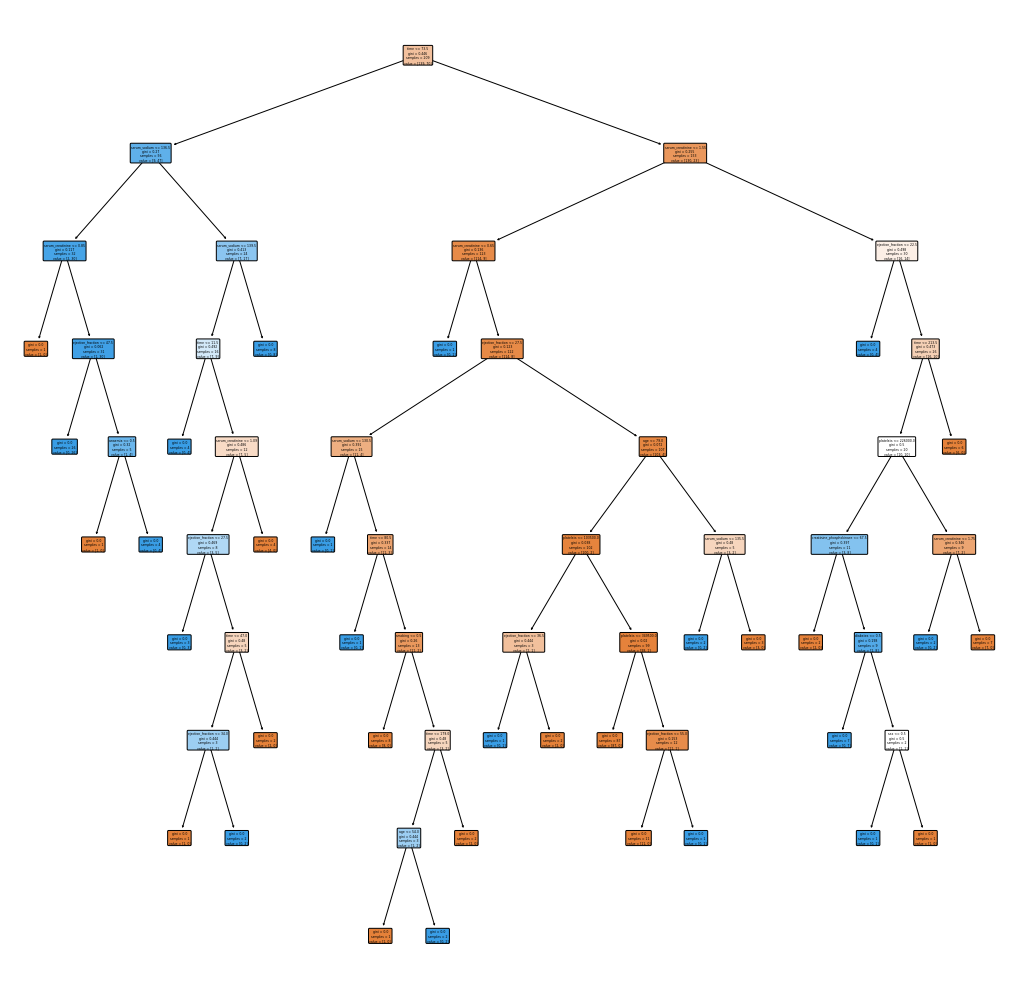

In [18]:
from sklearn import tree
plt.figure(figsize=(18,18))
tree.plot_tree(clf,filled=True, rounded=True, feature_names=x.columns)

In [19]:
pred = clf.predict(xtest)

In [20]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1])

In [21]:
np.array(ytest)

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1])

# **Confusion matrix**

In [24]:
#from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve

classification_report(ytest, pred)

'              precision    recall  f1-score   support\n\n           0       0.86      0.84      0.85        64\n           1       0.63      0.65      0.64        26\n\n    accuracy                           0.79        90\n   macro avg       0.74      0.75      0.75        90\nweighted avg       0.79      0.79      0.79        90\n'

In [26]:
print (classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85        64
           1       0.63      0.65      0.64        26

    accuracy                           0.79        90
   macro avg       0.74      0.75      0.75        90
weighted avg       0.79      0.79      0.79        90



In [27]:
cm = confusion_matrix(ytest, pred)

In [28]:
cm

array([[54, 10],
       [ 9, 17]])

Text(0.5, 1.0, 'Confusion Matrix')

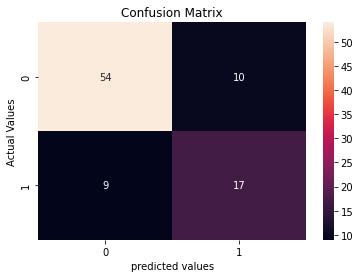

In [32]:
sns.heatmap(cm, annot=True)
plt.xlabel('predicted values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')

In [34]:
from numpy.ma.core import reshape
tp, fn, tn, fp =  confusion_matrix(ytest, pred).reshape(-1)

In [35]:
tp

54

In [36]:
fp

17

In [37]:
tn

9

In [38]:
fn

10

# **Home Work**

In [39]:
Accuracy = (tp+tn)/(tp+fp+tn+fn)

In [40]:
Accuracy

0.7

In [41]:
Precision = tp/(tp+fp)

In [42]:
Precision

0.7605633802816901

In [43]:
TPR = tp/(tp+fn) 

In [44]:
TPR

0.84375

In [45]:
FPR = fp/(fp+tn)

In [46]:
FPR

0.6538461538461539

In [49]:
F1_measure = (Precision+TPR)/2

In [50]:
F1_measure

0.802156690140845

In [51]:
F1 = (2*Precision*TPR)/(Precision+TPR)

In [52]:
F1

0.8

In [60]:
TNR = tn/(tn+fp)

In [61]:
TNR

0.34615384615384615

In [55]:
CSI = tp/(tp+fn+fp)

In [56]:
CSI

0.6666666666666666

In [57]:
FDR = fp/(tp+fp)

In [58]:
FDR

0.23943661971830985

In [62]:
balanced_accuracy =(TPR+TNR)/2 

In [63]:
balanced_accuracy

0.5949519230769231

# **AUC**

In [64]:
from sklearn.metrics import plot_roc_curve

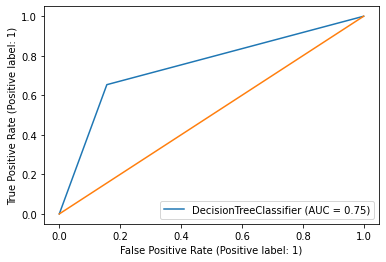

In [65]:
plot_roc_curve(clf, xtest, ytest)
plt.plot([0,1],[0,1])

In [66]:
clf.score(xtest, ytest)

0.7888888888888889